<a href="https://colab.research.google.com/github/Jayasurya1108/ML-Projects/blob/main/Logistic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [221]:
df = pd.read_csv("/content/loanfile-2.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [222]:
df.shape

(612, 13)

In [223]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [224]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [225]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,612.000000,590.000000,598.000000,562.000000
mean,5401.238562,1626.543987,146.366102,341.939799,0.843416
std,6118.306169,2929.560873,85.714404,65.221050,0.363732
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.750000,0.000000,100.000000,360.000000,1.000000
50%,3806.000000,1211.500000,127.500000,360.000000,1.000000
75%,5785.000000,2303.000000,167.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            612 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            609 non-null    object 
 3   Dependents         597 non-null    object 
 4   Education          612 non-null    object 
 5   Self_Employed      580 non-null    object 
 6   ApplicantIncome    612 non-null    int64  
 7   CoapplicantIncome  612 non-null    float64
 8   LoanAmount         590 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     562 non-null    float64
 11  Property_Area      612 non-null    object 
 12  Loan_Status        612 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.3+ KB


In [227]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [228]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean()).astype('int')

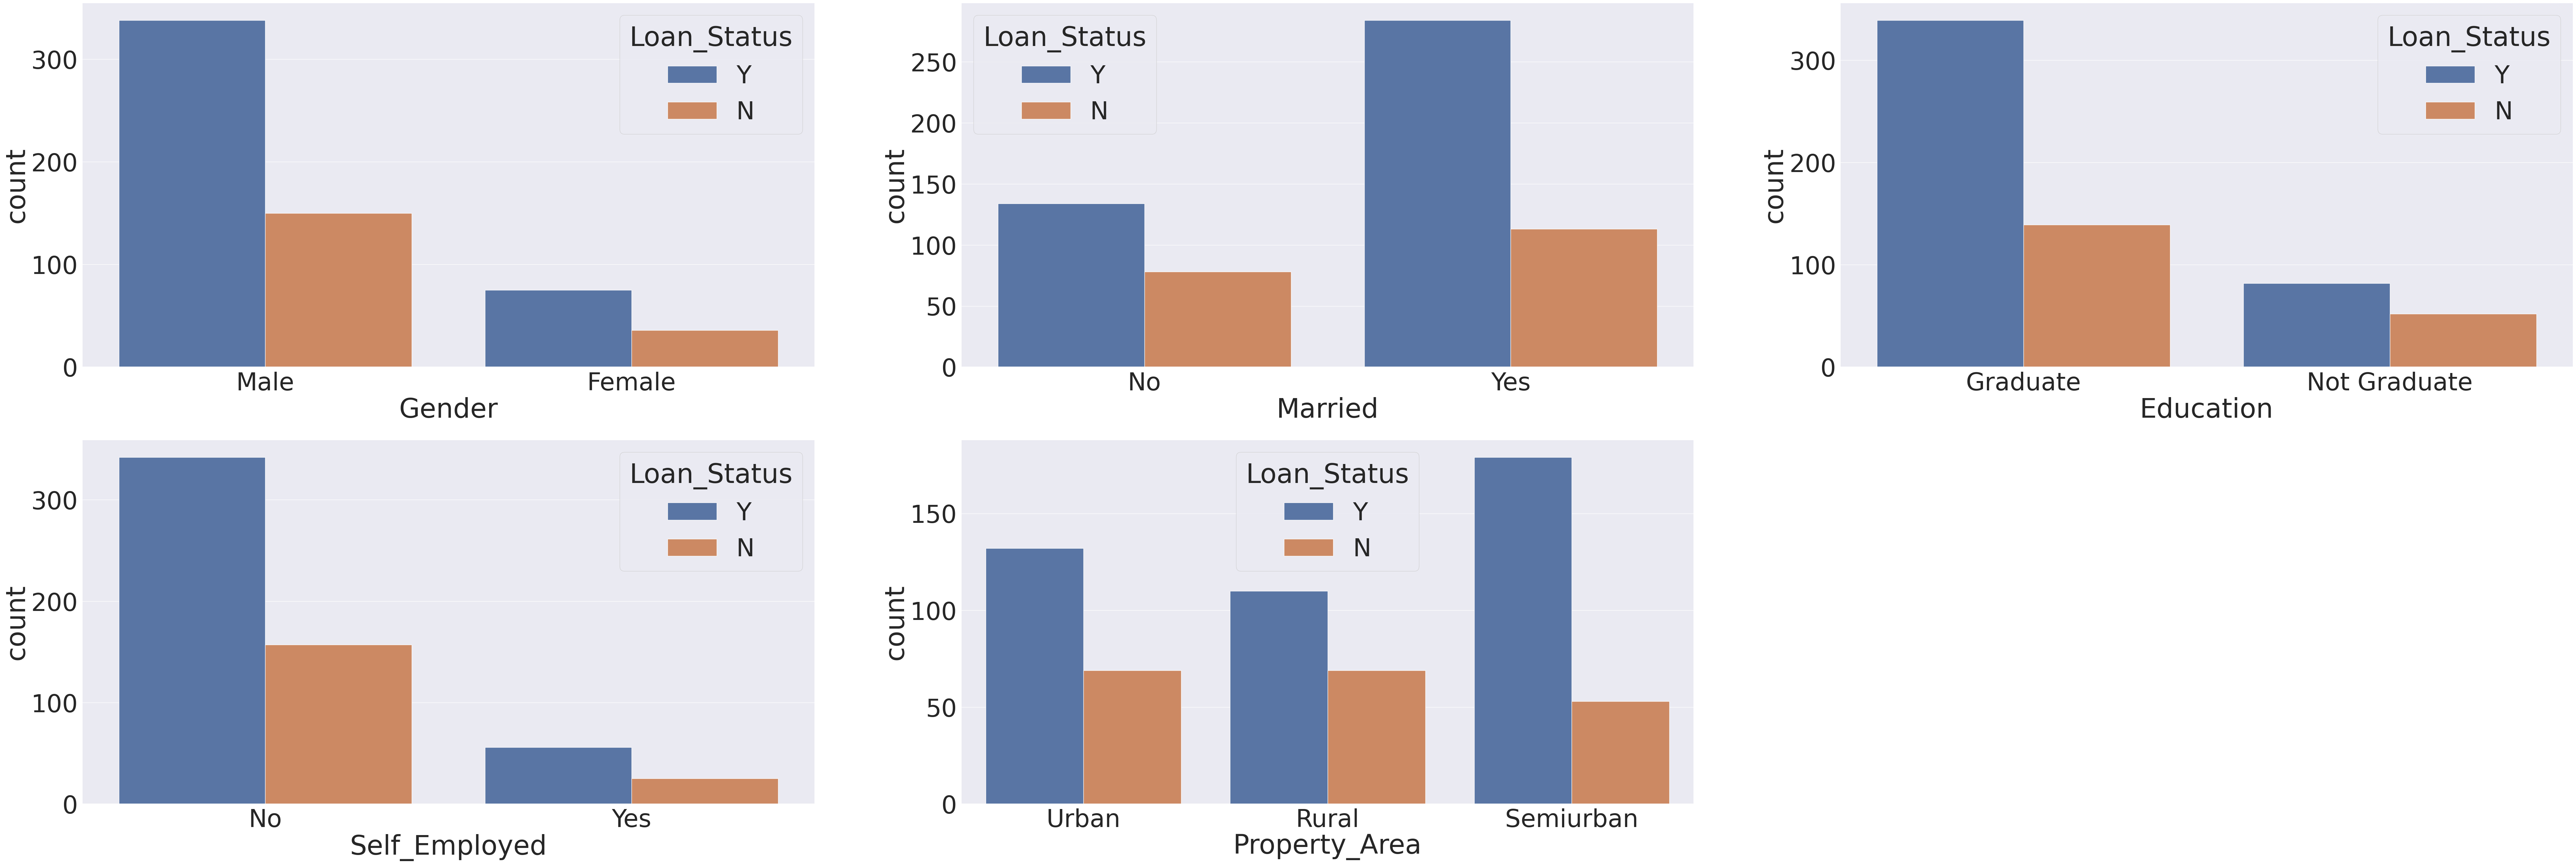

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(100, 50))
sns.set(font_scale=5)

plt.subplot(331)
sns.countplot(x='Gender', hue='Loan_Status', data=df)

plt.subplot(332)
sns.countplot(x='Married', hue='Loan_Status', data=df)

plt.subplot(333)
sns.countplot(x='Education', hue='Loan_Status', data=df)

plt.subplot(334)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

plt.subplot(335)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

plt.show()


In [230]:
df_Dependents = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0     344
1     102
2     100
3+     51
Name: Dependents, dtype: int64

In [231]:
df['Loan_Status'].replace(['Y', 'N'], [1, 0], inplace=True)

In [232]:
df['Loan_Status'].value_counts()

1    421
0    191
Name: Loan_Status, dtype: int64

In [233]:
df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
df['Gender'].value_counts()


1.0    488
0.0    111
Name: Gender, dtype: int64

In [234]:
df['Married'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Married'].value_counts()

1.0    397
0.0    212
Name: Married, dtype: int64

In [252]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,127.0,360.0,1,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1,2,1


In [236]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [237]:
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'7':7,'3+':3})
df['Dependents'].value_counts()

0.0    344
1.0    102
3.0     51
Name: Dependents, dtype: int64

In [238]:
df = df.dropna(subset=['Gender'])


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 611
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            599 non-null    object 
 1   Gender             599 non-null    float64
 2   Married            596 non-null    float64
 3   Dependents         486 non-null    float64
 4   Education          599 non-null    object 
 5   Self_Employed      567 non-null    object 
 6   ApplicantIncome    599 non-null    int64  
 7   CoapplicantIncome  599 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   585 non-null    float64
 10  Credit_History     599 non-null    int64  
 11  Property_Area      599 non-null    object 
 12  Loan_Status        599 non-null    int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 65.5+ KB


In [240]:
df.shape

(599, 13)

In [241]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                3
Dependents           113
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [242]:
df['Dependents'].fillna(df['Dependents'].mean(), inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(1.0, inplace=True)
df['Married'].fillna('Yes', inplace=True)

<ipython-input-242-c5b8ced8248c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'].fillna(df['Dependents'].mean(), inplace=True)
<ipython-input-242-c5b8ced8248c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Self_Employed'].fillna('No', inplace=True)
<ipython-input-242-c5b8ced8248c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
<ipython-input-242

In [243]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = df['Married'].astype('str')
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])

<ipython-input-243-535f4f8a718a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
<ipython-input-243-535f4f8a718a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married'] = df['Married'].astype('str')
<ipython-input-243-535f4f8a718a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [244]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [245]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,127.0,360.0,1,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1,2,1


In [246]:

df = df.drop('Loan_ID', axis=1)


In [247]:

x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [248]:

logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression()

In [249]:

y_pred = logreg.predict(x_test)


In [250]:
print(y_pred)

[1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 1]


In [251]:

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)


80.0


In [253]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[15 17]
 [ 7 81]]


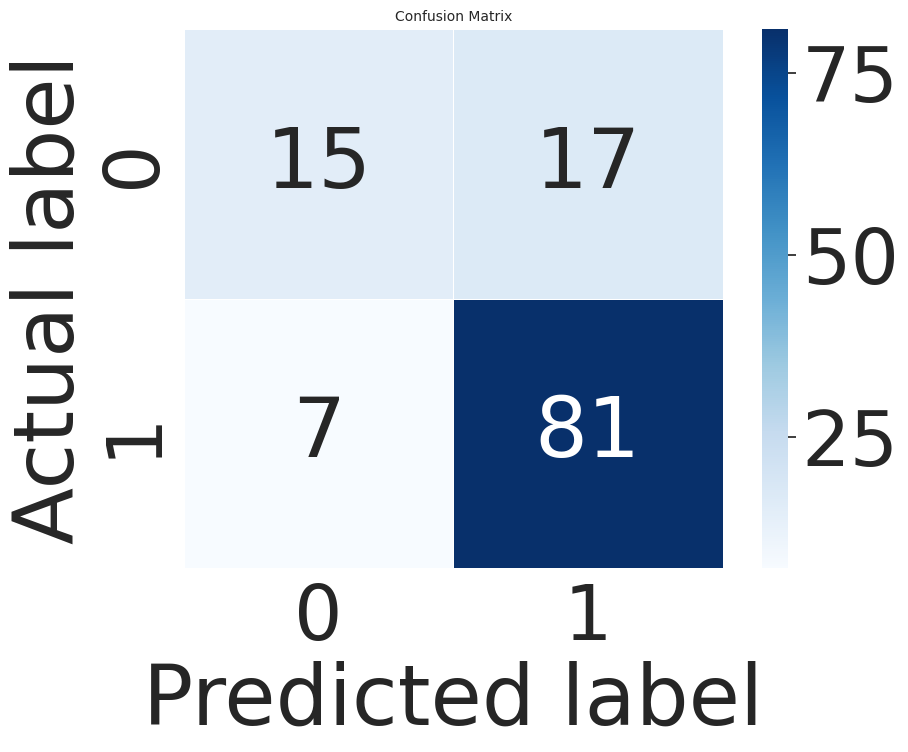

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=(10))
plt.show()
